![Xilinx Logo](images/xilinx_logo.png "Xilinx Logo")

# 1. Introduction

This notebook demonstrates how to use the hardware monitors for power monitoring at specific rails

In this notebook, you will:
1. Plot the power utilization in a real-time graph

# 2. Imports and Initialization

Import all python modules required for this notebook. 

In [1]:
import sensors
import time
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline

# 2. Plot and Read the Throughput Values in Real-Time

The Versal Board consists of multiple power rails. 17 of these rails have INA226 Hardware Monitors built in for tracking power consumption. These monitors can be read to gather information regarding power consumption throughout the board.

The rails with monitoring include:

| Rail Name | Vout (V) | Device |
| --- | --- | --- |
| vccint | 0.80 | ina226-i2c-3-40 |
| vcc soc | 0.80 | ina226-i2c-3-41 |
| vcc pslp | 0.80 | ina226-i2c-3-44 |
| vcc psfp | 0.80 | ina226-i2c-3-45 |
| vccaux | 1.5 | ina226-i2c-5-40 |
| vcc ram io | 0.80 | ina226-i2c-3-43 |
| vccint pmc | 0.80 | ina226-i2c-3-42 |
| vcco mio | 1.8 | ina226-i2c-5-45 |
| vcc3v3 | 3.3 | ina226-i2c-5-47 |
| vcc1v8 | 1.8 | ina226-i2c-5-46 |
| vccaux pmc | 1.5 | ina226-i2c-5-41 |
| vcc1v2 ddr4 | 1.2 | ina226-i2c-5-48 |
| vcc1v1 lp4 | 1.1 | ina226-i2c-5-49 |
| mgtyvccaux | 1.5 | ina226-i2c-5-4d |
| vadj fmc | 1.2* | ina226-i2c-5-4a |
| mgtyavcc | 0.88 | ina226-i2c-5-4b |
| mgtyavtt | 1.2 | ina226-i2c-5-4c |

\*Vadj is set to 1.2V according to the MIPI standard.

For more information regarding the power rails, refer to: 
https://www.xilinx.com/content/dam/xilinx/support/documentation/boards_and_kits/vck190/ug1366-vck190-eval-bd.pdf

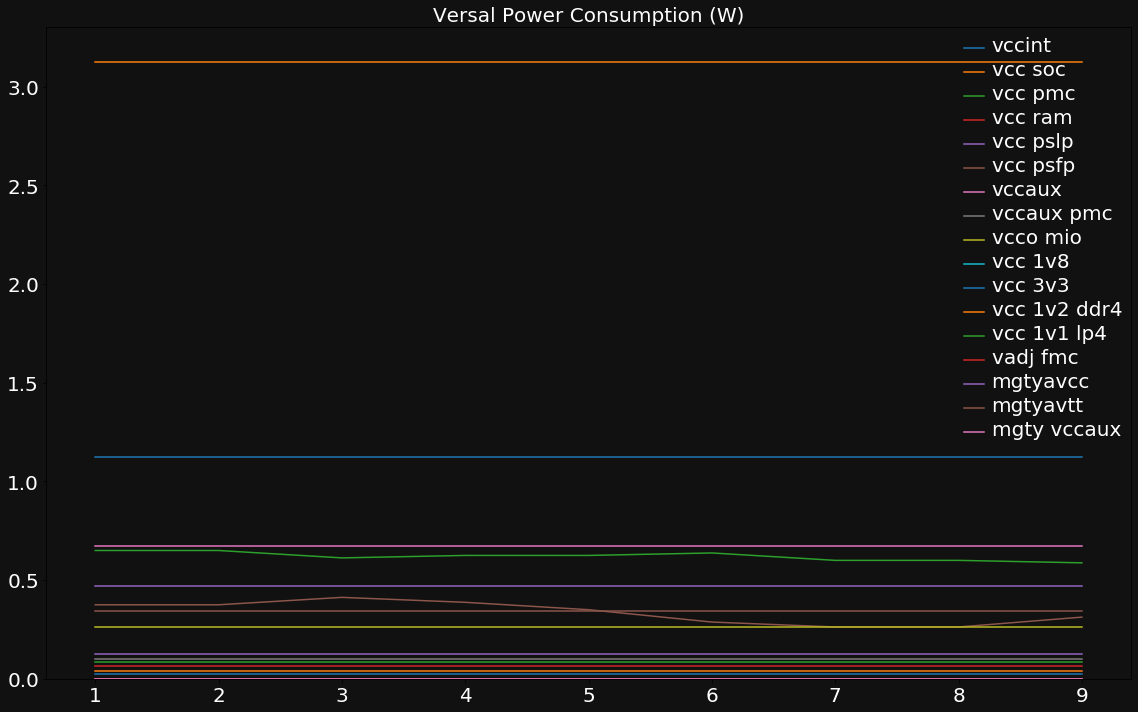

In [ ]:
regulator_labels = {
    'ina226-i2c-5-4d' : 'mgtyvccaux',
    'ina226-i2c-5-4b' : 'mgtyavcc',
    'ina226-i2c-5-45' : 'vcc psfp',
    'ina226-i2c-5-49' : 'vcc1v1 lp4',
    'ina226-i2c-5-40' : 'vccaux',
    'ina226-i2c-5-47' : 'vcc3v3',
    'ina226-i2c-3-44' : 'vcc pslp',
    'ina226-i2c-3-42' : 'vccint pmc',
    'ina226-i2c-3-40' : 'vccint',
    'ina226-i2c-5-4c' : 'mgtyavtt',
    'ina226-i2c-5-46' : 'vcc1v8',
    'ina226-i2c-5-4a' : 'vadj fmc',
    'ina226-i2c-5-41' : 'vccaux pmc',
    'ina226-i2c-5-48' : 'vcc1v2 ddr4',
    'ina226-i2c-3-45' : 'vcc psfp',
    'ina226-i2c-3-43' : 'vcc ram io',
    'ina226-i2c-3-41' : 'vcc soc'
}
max_len = 10
data = {}

for i in regulator_labels:
    data[regulator_labels[i]] = []

sensors.init()

while True:
    clear_output(wait=True)
    
    power_readings = []
    for chip in sensors.iter_detected_chips():
        for feature in chip:
            if feature.label == "power1":
                power_readings.append(feature.get_value())

    fig, ax = plt.subplots()
    ax.set_facecolor('#111111')
    fig.set_facecolor('#111111')
    ax.set_title('Versal Power Consumption (W)', color='white',size='20')
    plt.setp(plt.getp(ax, 'yticklabels'), color='white',size='20')
    ax.set_xticklabels([i for i in range(max_len)],color='white',size='20')
    fig.set_size_inches(16, 10)
    plt.tight_layout()
    
    n = 0
    for i in regulator_labels:
        data[regulator_labels[i]].append(power_readings[n])
        if len(data[regulator_labels[i]]) == max_len:
            data[regulator_labels[i]] = data[regulator_labels[i]][1:]
        plt.plot(data[regulator_labels[i]],label=regulator_labels[i])
        n = n + 1
    
    plt.legend(facecolor='#111111')
    plt.ylim([0, 15])
    leg = plt.legend(framealpha = 0, loc = 'upper right')
    for text in leg.get_texts():
        plt.setp(text, color = 'w', size=20)
    plt.show()

    time.sleep(0.5)

# 3. Summary

In this notebook you learned how to:
1. Display power utilization metrics on a live plot

<center>Copyright© 2019 Xilinx</center>